# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
total_data.shape
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
total_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
total_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

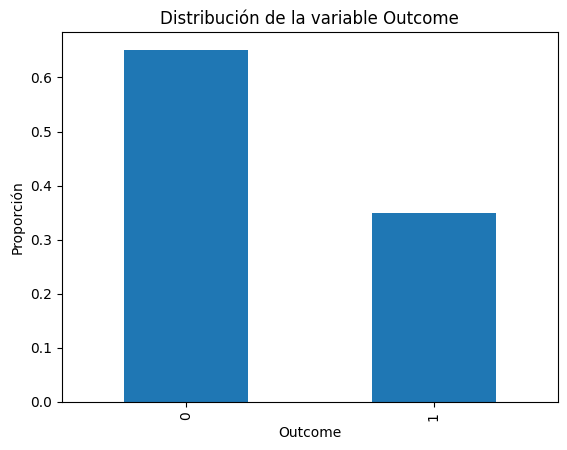

In [7]:
total_data['Outcome'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribución de la variable Outcome")
plt.xlabel("Outcome")
plt.ylabel("Proporción")
plt.show()


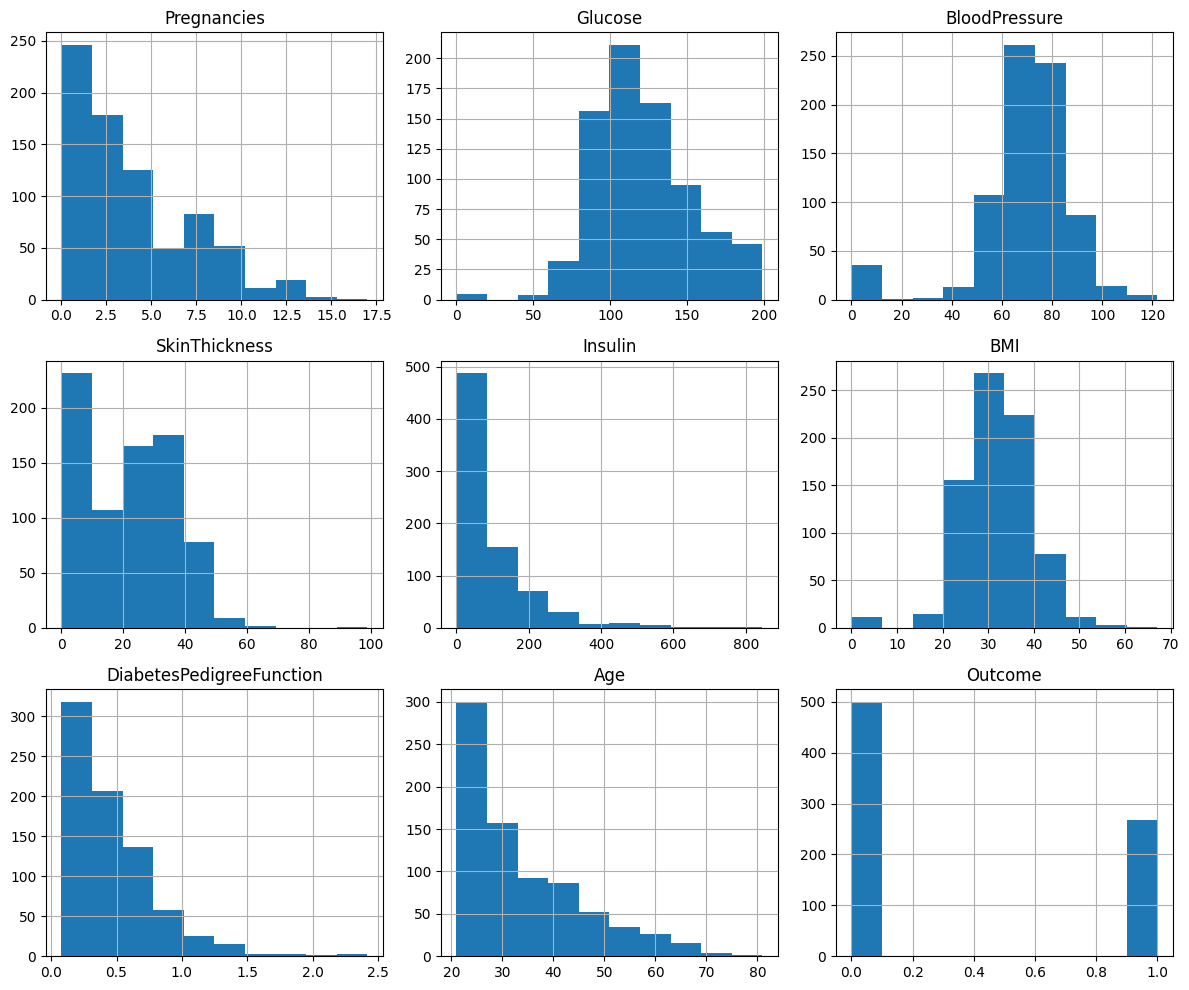

In [8]:
total_data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

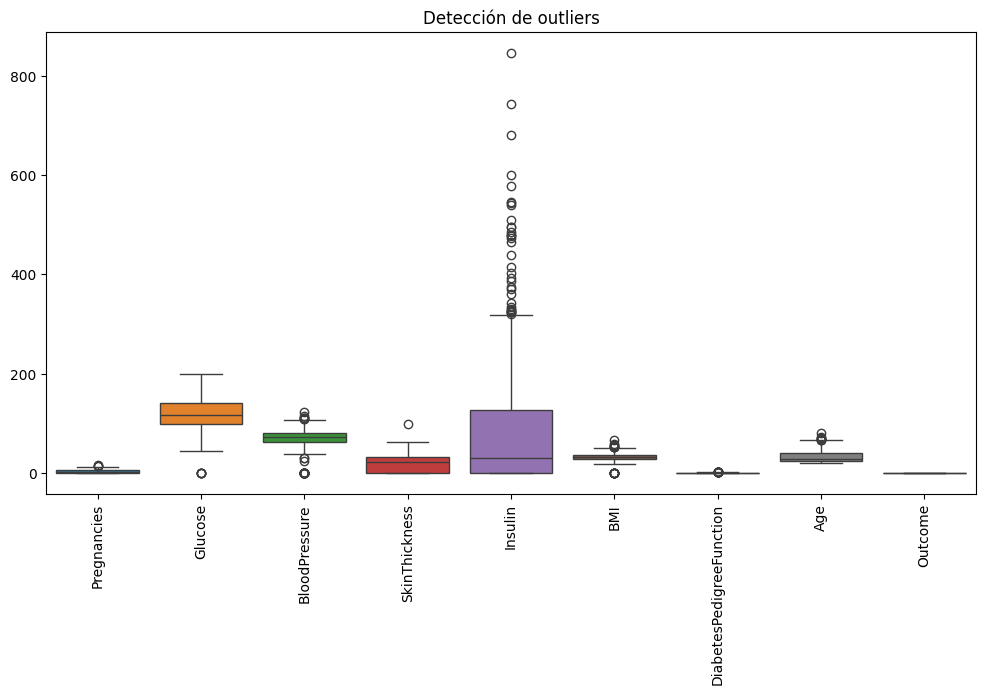

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=total_data)
plt.xticks(rotation=90)
plt.title("Detección de outliers")
plt.show()


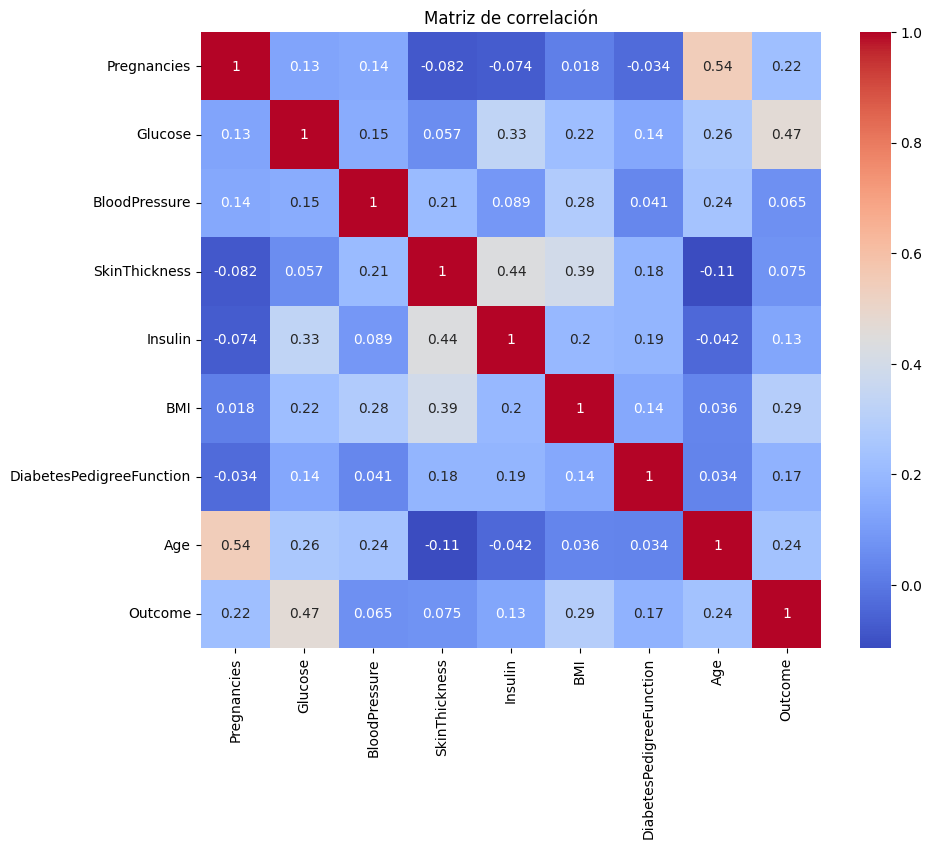

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(total_data.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split


In [12]:
X = total_data.drop("Outcome", axis=1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
selection_model = SelectKBest(k=7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]

X_train_sel = pd.DataFrame(
    selection_model.transform(X_train),
    columns=selected_columns
)

X_test_sel = pd.DataFrame(
    selection_model.transform(X_test),
    columns=selected_columns
)

X_train_sel.head()


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,90.0,12.0,43.0,27.2,0.580,24.0
1,5.0,126.0,27.0,22.0,29.6,0.439,40.0
2,2.0,105.0,40.0,94.0,34.9,0.225,25.0
3,1.0,146.0,0.0,0.0,29.7,0.564,29.0
4,0.0,95.0,39.0,105.0,44.6,0.366,22.0


In [14]:
X_test_sel.head()


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,159.0,0.0,0.0,27.4,0.294,40.0
1,10.0,68.0,23.0,49.0,35.5,0.285,47.0
2,2.0,122.0,27.0,200.0,35.9,0.483,26.0
3,7.0,114.0,0.0,0.0,27.4,0.732,34.0
4,2.0,74.0,0.0,0.0,0.0,0.102,22.0


In [ ]:
def grid_DecisionTree(X_train, y_train):
    model = DecisionTreeClassifier(random_state=112)

    class_weight = [{0:0.05, 1:0.95},
                    {0:0.5, 1:0.5}]
    max_depth = [4, 7, 12, 22, 26, 50]
    min_samples_leaf = [5, 10, 12, 15, 18, 20]
    min_samples_split = [5, 7, 10, 12, 22, 33, 40]
    criterion = ["gini", "entropy"]

    grid = dict(
        class_weight=class_weight,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion
    )

    cv = RepeatedStratifiedKFold(
        n_splits=3,
        n_repeats=1,
        random_state=141
    )

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        n_jobs=-1,
        cv=cv,
        scoring='accuracy',
        error_score='raise'
    )

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


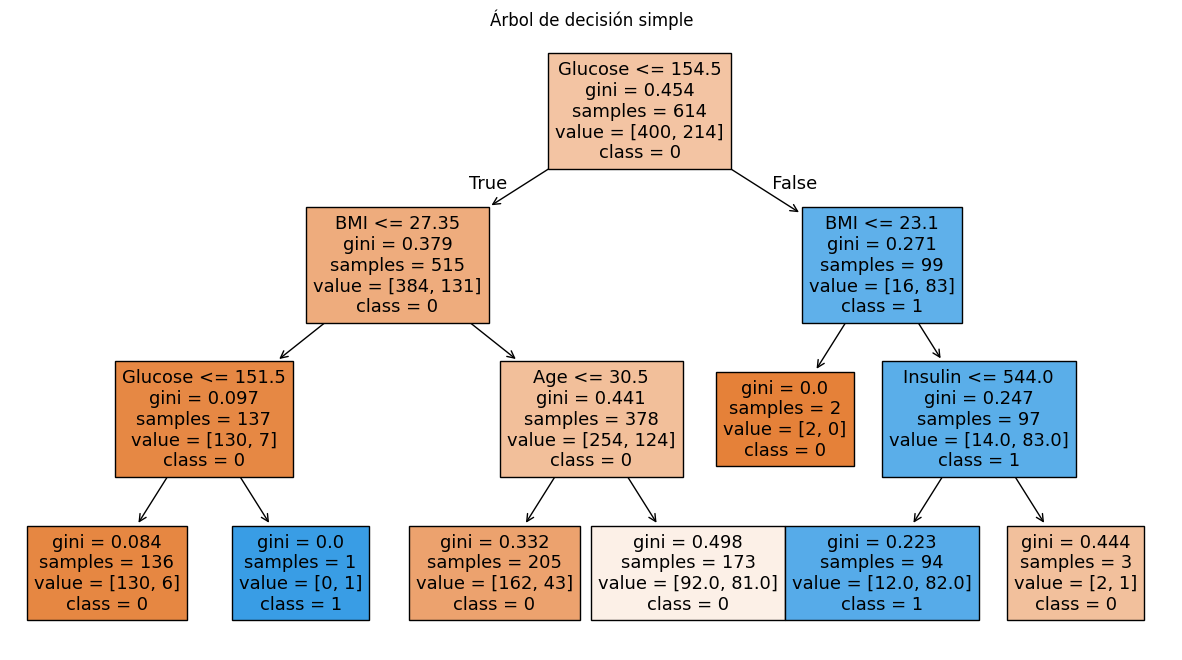

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

simple_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=3
)

simple_tree.fit(X_train_sel, y_train)

plt.figure(figsize=(15, 8))
tree.plot_tree(
    simple_tree,
    feature_names=X_train_sel.columns,
    class_names=["0", "1"],
    filled=True
)
plt.title("Árbol de decisión simple")
plt.show()


In [17]:
def grid_RandomForest(X_train, y_train):
    model = RandomForestClassifier(random_state=0)

    n_estimators = np.arange(100, 500, 100)
    criterion = ['gini', 'entropy']
    min_samples_split = [0.05, 0.1]
    max_depth = [7, 12, 20]

    grid = dict(
        n_estimators=n_estimators,
        criterion=criterion,
        min_samples_split=min_samples_split,
        max_depth=max_depth
    )

    cv = RepeatedStratifiedKFold(
        n_splits=3,
        n_repeats=1,
        random_state=1
    )

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        n_jobs=-1,
        cv=cv,
        scoring='roc_auc',
        error_score='raise'
    )

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

def grid_AdaBoost(X_train, y_train):
    model = AdaBoostClassifier(random_state=1)

    n_estimators = [150, 200, 250, 300]
    learning_rate = [0.01, 0.1, 1, 0.001]

    grid = dict(
        n_estimators=n_estimators,
        learning_rate=learning_rate
    )

    cv = RepeatedStratifiedKFold(
        n_splits=3,
        n_repeats=1,
        random_state=1
    )

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        n_jobs=-1,
        cv=cv,
        scoring='roc_auc',
        error_score='raise'
    )

    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


In [19]:
best_dt = grid_DecisionTree(X_train_sel, y_train)
preds_dt = best_dt.predict(X_test_sel)
print(classification_report(y_test, preds_dt))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [20]:
best_rf = grid_RandomForest(X_train_sel, y_train)
preds_rf = best_rf.predict(X_test_sel)
print(classification_report(y_test, preds_rf))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [21]:
best_ab = grid_AdaBoost(X_train_sel, y_train)
preds_ab = best_ab.predict(X_test_sel)
print(classification_report(y_test, preds_ab))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [22]:
best_dt


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",7
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",15
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",112
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [23]:
best_rf


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",np.int64(100)
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",0.1
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with sign

In [24]:
best_ab


,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",300
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",1


En los tres modelos, la clase 0 (no diabetes) es la que presenta mejores resultados, con valores más altos de precisión y recall. Esto indica que los modelos identifican mejor a los pacientes sin diabetes que a aquellos con la enfermedad. Por el contrario, la clase 1 (diabetes) es la más difícil de predecir, mostrando menores valores de recall, especialmente en Random Forest y AdaBoost, lo que sugiere la presencia de falsos negativos.

El Árbol de Decisión fue el modelo con mejor rendimiento general, alcanzando un accuracy del 77% y un mejor equilibrio entre precisión y recall para ambas clases en comparación con los otros modelos. Random Forest y AdaBoost obtuvieron resultados ligeramente inferiores, con menor capacidad para detectar correctamente la clase positiva.